In [9]:
import torch
torch.cuda.is_available()

False

In [1]:
import pandas as pd
df = pd.read_csv('/Users/suchirnaik/Downloads/new_headline_saracasm.csv')



In [7]:
df

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [4]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [25]:
data = df.sample(n=1000, axis=0)




In [27]:
data['is_sarcastic'].value_counts()

0    517
1    483
Name: is_sarcastic, dtype: int64

In [10]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
### using bert uncased 

In [28]:
from transformers import BertTokenizer
# Tokenize the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_data = tokenizer(data['headline'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Prepare labels
labels = torch.tensor(data['is_sarcastic'].tolist())

In [29]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(encoded_data['input_ids'], labels, test_size=0.2, random_state=42)

In [11]:
from torch.utils.data import TensorDataset, DataLoader

In [31]:
# Define a DataLoader
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [32]:
from transformers import BertForSequenceClassification
# Load the pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [33]:
# Define the loss function and optimizer
import torch.nn as nn 
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

In [24]:
# Training loop
model.train()
for epoch in range(3):  # Adjust the number of epochs as needed
    for batch in train_loader:
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

KeyboardInterrupt: 

In [34]:
from tqdm.notebook import tqdm  # Import tqdm for progress bar

# Training loop
model.train()
total_epochs = 3  # Adjust the number of epochs as needed

for epoch in range(total_epochs):
    print(f"Epoch {epoch + 1}/{total_epochs}")
    
    # Use tqdm for a progress bar over the batches
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


Epoch 1/3


Epoch 1:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2/3


Epoch 2:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3/3


Epoch 3:   0%|          | 0/50 [00:00<?, ?it/s]

In [35]:
model.eval()
with torch.no_grad():
    outputs = model(test_inputs, labels=test_labels)
    predicted_labels = torch.argmax(outputs.logits, dim=1)

accuracy = (predicted_labels == test_labels).sum().item() / len(test_labels)
print('Accuracy:', accuracy)


Accuracy: 0.835


In [ ]:
Accuracy 83.5 for 1000 smaples 

In [ ]:
Lets incraese the saample size slightly and change the number of epoch s too

In [36]:
data = df.sample(n=1500, axis=0)

In [39]:
data

,is_sarcastic,headline
16318,1,report: u.s. parents' top concern is child dyi...
26086,1,report: you're far too dumb to be reading the ...
7730,1,norah jones releases debut album for third time
10457,1,"girl gone wild actually just regular girl, onl..."
19025,0,u.s. bobsled team pays tribute to late gold me...
...,...,...
5003,1,"tanned, exquisitely coiffed bernie sanders tel..."
4872,1,scarf tragically lost in 15-coat pile-up
21879,0,why being killed by a lightsaber would be so m...
20285,0,former senator to run pot company


In [40]:
data['is_sarcastic'].value_counts()

0    771
1    729
Name: is_sarcastic, dtype: int64

In [41]:
from transformers import BertTokenizer
# Tokenize the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_data = tokenizer(data['headline'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Prepare labels
labels = torch.tensor(data['is_sarcastic'].tolist())

In [42]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(encoded_data['input_ids'], labels, test_size=0.2, random_state=42)

In [43]:
from torch.utils.data import TensorDataset, DataLoader

In [44]:
# Define a DataLoader
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [45]:
from transformers import BertForSequenceClassification
# Load the pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [46]:
# Define the loss function and optimizer
import torch.nn as nn 
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

In [47]:
from tqdm.notebook import tqdm  # Import tqdm for progress bar

# Training loop
model.train()
total_epochs = 5  # Adjust the number of epochs as needed

for epoch in range(total_epochs):
    print(f"Epoch {epoch + 1}/{total_epochs}")
    
    # Use tqdm for a progress bar over the batches
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


Epoch 1/5


Epoch 1:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch 2/5


Epoch 2:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch 3/5


Epoch 3:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch 4/5


Epoch 4:   0%|          | 0/75 [00:00<?, ?it/s]

Epoch 5/5


Epoch 5:   0%|          | 0/75 [00:00<?, ?it/s]

In [48]:
model.eval()
with torch.no_grad():
    outputs = model(test_inputs, labels=test_labels)
    predicted_labels = torch.argmax(outputs.logits, dim=1)

accuracy = (predicted_labels == test_labels).sum().item() / len(test_labels)
print('Accuracy:', accuracy)


Accuracy: 0.8866666666666667


In [ ]:
## increasinc eoch and accuray defineitel helpwd 

In [59]:
data = df.sample(n=2500, axis=0,random_state=42)

In [136]:
data

,is_sarcastic,headline
27927,0,states slow to shut down weak teacher educatio...
1660,1,drone places fresh kill on steps of white house
96,1,report: majority of instances of people gettin...
6237,1,"sole remaining lung filled with rich, satisfyi..."
6650,0,the gop's stockholm syndrome
...,...,...
14007,0,"hong kong actor wears 'brown face,' highlights..."
18968,0,why i want to live like i'm 40 in my 20s
12064,0,the president's mission to garner sympathy for...
2408,0,kansas city-area waiter gets world series tick...


In [137]:
from transformers import BertTokenizer
# Tokenize the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_data = tokenizer(data['headline'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Prepare labels
labels = torch.tensor(data['is_sarcastic'].tolist())

In [138]:
len(encoded_data)

3

In [61]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(encoded_data['input_ids'], labels, test_size=0.2, random_state=42)

In [62]:
from torch.utils.data import TensorDataset, DataLoader

In [63]:
# Define a DataLoader
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [64]:
from transformers import BertForSequenceClassification
# Load the pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [65]:
# Define the loss function and optimizer
import torch.nn as nn 
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

In [66]:
from tqdm.notebook import tqdm  # Import tqdm for progress bar

# Training loop
model.train()
total_epochs = 5  # Adjust the number of epochs as needed

for epoch in range(total_epochs):
    print(f"Epoch {epoch + 1}/{total_epochs}")
    
    # Use tqdm for a progress bar over the batches
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


Epoch 1/5


Epoch 1:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 2/5


Epoch 2:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 3/5


Epoch 3:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 4/5


Epoch 4:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 5/5


Epoch 5:   0%|          | 0/125 [00:00<?, ?it/s]

In [67]:
model.eval()
with torch.no_grad():
    outputs = model(test_inputs, labels=test_labels)
    predicted_labels = torch.argmax(outputs.logits, dim=1)

accuracy = (predicted_labels == test_labels).sum().item() / len(test_labels)
print('Accuracy:', accuracy)


Accuracy: 0.88


In [68]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate F1 score
f1 = f1_score(test_labels, predicted_labels)

# Calculate precision
precision = precision_score(test_labels, predicted_labels)

# Calculate recall
recall = recall_score(test_labels, predicted_labels)

# Print the scores
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)


F1 Score: 0.8695652173913043
Precision: 0.8849557522123894
Recall: 0.8547008547008547


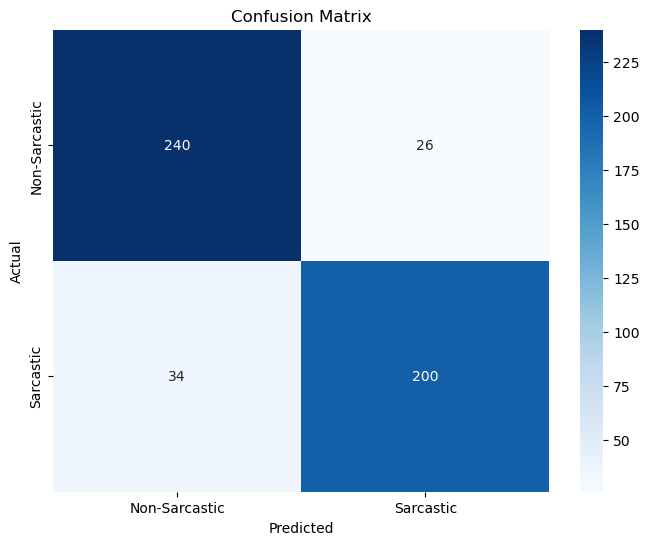

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Sarcastic', 'Sarcastic'],
            yticklabels=['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Testing our model on the compltee dataset for new sheadlines 

In [70]:
# Assuming df is your complete DataFrame
encoded_data_complete = tokenizer(df['headline'].tolist(), padding=True, truncation=True, return_tensors='pt')


In [71]:
# Assuming df is your complete DataFrame
labels_complete = torch.tensor(df['is_sarcastic'].tolist())


In [74]:
# Assuming df is your complete DataFrame
complete_dataset = TensorDataset(encoded_data_complete['input_ids'], labels_complete)
complete_loader = DataLoader(complete_dataset, batch_size=64, shuffle=False)  


In [75]:
model.eval()
predicted_labels_complete = []

with torch.no_grad():
    for batch in tqdm(complete_loader, desc='Testing'):
        input_ids, labels = batch
        outputs = model(input_ids)
        predicted_labels = torch.argmax(outputs.logits, dim=1)
        predicted_labels_complete.extend(predicted_labels.tolist())

predicted_labels_complete = torch.tensor(predicted_labels_complete)


Testing:   0%|          | 0/448 [00:00<?, ?it/s]

In [77]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Convert the true labels (labels_complete) to a numpy array
true_labels = labels_complete.numpy()

# Convert the predicted labels (predicted_labels_complete) to a numpy array
predicted_labels = predicted_labels_complete.numpy()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Print the scores
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 0.8805339110381215
F1 Score: 0.8741117125078244
Precision: 0.877634011090573
Recall: 0.8706175737127769


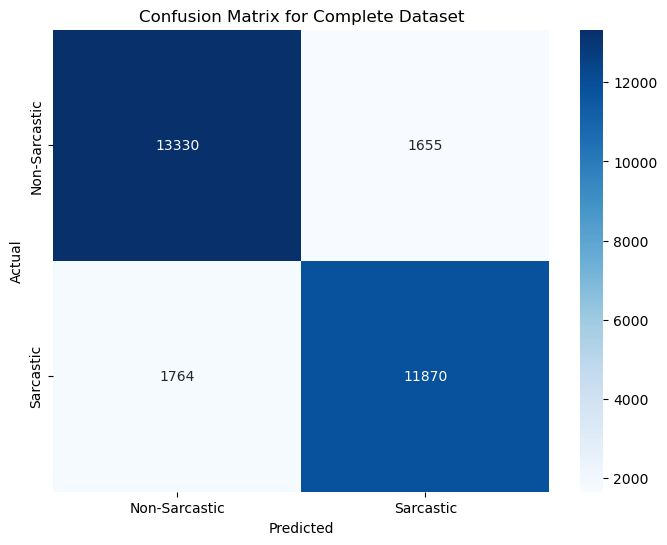

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix_complete = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_complete, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Sarcastic', 'Sarcastic'],
            yticklabels=['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Complete Dataset')
plt.show()


In [ ]:
### using the above pretrained model on the reddit dadastset 

In [2]:
import pandas as pd
df_reddit = pd.read_csv('/Users/suchirnaik/Downloads/train-balanced-sarcasm_1.csv')



In [100]:
# Select 500 samples for each label
desired_samples_per_label = 100

# Select 500 samples labeled as 1
samples_label_1 = df_reddit[df_reddit['label'] == 1].sample(n=desired_samples_per_label, random_state=42)

# Select 500 samples labeled as 0
samples_label_0 = df_reddit[df_reddit['label'] == 0].sample(n=desired_samples_per_label, random_state=42)

# Concatenate the selected samples
reddit_data = pd.concat([samples_label_1, samples_label_0], ignore_index=True)


In [101]:
reddit_data

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,"If you were made of steel, you could get the l...",appletart,bicycletouring,1,1,0,2014-06,2014-06-01 03:00:18,If you don't spend 1100 dollars minimum on you...
1,1,"Here, have an",romulusnr,boston,1,1,0,2015-09,2015-09-10 01:25:40,"As I said It's just one bad apple, man. It's j..."
2,1,"I think you're referring to S. Chinderpool, wh...",Sphenoidman,Cricket,1,1,0,2016-01,2016-01-23 23:26:00,So that's the last player gone from Brian Lara...
3,1,Fucking rigged bullshit,cowboysfan88,nba,5,5,0,2016-07,2016-07-15 05:59:09,Dennis Rodman attempted to have the number 69 ...
4,1,That's enough to convince me!,JaquiskiTaterTartt,49ers,1,1,0,2015-08,2015-08-21 23:49:20,"EA: ""Alright guys, people are tired of the sam..."
...,...,...,...,...,...,...,...,...,...,...
195,0,I think that nearly all anime fans will recomm...,903124,politics,1,1,0,2016-08,2016-08-05 17:08:23,I haven't watched anime since Desert Punk... I...
196,0,Holy fuck what,letsgoiowa,AskReddit,1,1,0,2016-07,2016-07-02 04:46:38,Move to Canada. We tax EVERYTHING. 12% (except...
197,0,Gotta love that conservative media brainwashing.,PBFT,politics,3,3,0,2016-07,2016-07-15 14:39:31,You'd eat shit from their pockets if they told...
198,0,hmmm try uninstalling the current driver resta...,Rope_And_Chair,techsupport,1,1,0,2014-04,2014-04-15 23:37:56,"OK so right after step 12, I got a error messa..."


In [102]:
reddit_data = reddit_data[['label','comment','parent_comment']]

In [103]:
reddit_data

,label,comment,parent_comment
0,1,"If you were made of steel, you could get the l...",If you don't spend 1100 dollars minimum on you...
1,1,"Here, have an","As I said It's just one bad apple, man. It's j..."
2,1,"I think you're referring to S. Chinderpool, wh...",So that's the last player gone from Brian Lara...
3,1,Fucking rigged bullshit,Dennis Rodman attempted to have the number 69 ...
4,1,That's enough to convince me!,"EA: ""Alright guys, people are tired of the sam..."
...,...,...,...
195,0,I think that nearly all anime fans will recomm...,I haven't watched anime since Desert Punk... I...
196,0,Holy fuck what,Move to Canada. We tax EVERYTHING. 12% (except...
197,0,Gotta love that conservative media brainwashing.,You'd eat shit from their pockets if they told...
198,0,hmmm try uninstalling the current driver resta...,"OK so right after step 12, I got a error messa..."


In [104]:
reddit_data['combined_text'] = reddit_data['comment'] + ' ' + reddit_data['parent_comment']

/var/folders/0w/78_w9pm16ts4trsks5rjpd440000gn/T/ipykernel_21339/3057874254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_data['combined_text'] = reddit_data['comment'] + ' ' + reddit_data['parent_comment']


In [105]:
reddit_data.head()

,label,comment,parent_comment,combined_text
0,1,"If you were made of steel, you could get the l...",If you don't spend 1100 dollars minimum on you...,"If you were made of steel, you could get the l..."
1,1,"Here, have an","As I said It's just one bad apple, man. It's j...","Here, have an As I said It's just one bad appl..."
2,1,"I think you're referring to S. Chinderpool, wh...",So that's the last player gone from Brian Lara...,"I think you're referring to S. Chinderpool, wh..."
3,1,Fucking rigged bullshit,Dennis Rodman attempted to have the number 69 ...,Fucking rigged bullshit Dennis Rodman attempte...
4,1,That's enough to convince me!,"EA: ""Alright guys, people are tired of the sam...","That's enough to convince me! EA: ""Alright guy..."


In [114]:
nan_in_columns = reddit_data.isna().sum()
nan_in_columns

label             0
comment           0
parent_comment    0
combined_text     0
dtype: int64

In [96]:
encoded_data = tokenizer(reddit_data['combined_text'].tolist(), padding=True, truncation=True, return_tensors='pt')

In [106]:
# Assuming df is your complete DataFrame
labels_complete = torch.tensor(reddit_data['label'].tolist())


In [108]:
# Assuming df is your complete DataFrame
# complete_dataset = TensorDataset(encoded_data_complete['input_ids'], labels_complete)
# complete_loader = DataLoader(complete_dataset, batch_size=16, shuffle=False)  


AssertionError: Size mismatch between tensors

In [109]:


# Align the number of samples
num_samples = min(len(encoded_data_complete['input_ids']), len(labels_complete))
encoded_data_aligned = {key: value[:num_samples] for key, value in encoded_data_complete.items()}
labels_aligned = labels_complete[:num_samples]

# Create TensorDataset
complete_dataset = TensorDataset(encoded_data_aligned['input_ids'], labels_aligned)


In [119]:
len(complete_dataset)

200

In [120]:
len(labels_aligned)

200

In [110]:
complete_loader = DataLoader(complete_dataset, batch_size=16, shuffle=False) 

In [122]:
model.eval()
predicted_labels_reddit = []

with torch.no_grad():
    for batch in tqdm(complete_loader, desc='Testing'):
        input_ids, labels = batch
        outputs = model(input_ids)
        predicted_labels = torch.argmax(outputs.logits, dim=1)
        predicted_labels_reddit.extend(predicted_labels.tolist())

predicted_labels_reddit = torch.tensor(predicted_labels_reddit)


Testing:   0%|          | 0/13 [00:00<?, ?it/s]

In [125]:
print('Number of samples in predicted_labels:', len(predicted_labels_reddit))

Number of samples in predicted_labels: 200


In [ ]:
###selecting reddit_data and training the model

In [126]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Convert the true labels (labels_complete) to a numpy array
true_labels = labels_complete.numpy()

# Convert the predicted labels (predicted_labels_complete) to a numpy array
predicted_labels = predicted_labels_reddit.numpy()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Print the scores
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 0.445
F1 Score: 0.4064171122994653
Precision: 0.4367816091954023
Recall: 0.38


In [ ]:
### So lets train the dataset on a selctd=ed number of reddidt data 

In [32]:
# Select 1000 samples for each label
desired_samples_per_label = 200

# Select 1000 samples labeled as 1
samples_label_1 = df_reddit[df_reddit['label'] == 1].sample(n=desired_samples_per_label, random_state=42)

# Select 10000 samples labeled as 0
samples_label_0 = df_reddit[df_reddit['label'] == 0].sample(n=desired_samples_per_label, random_state=42)

# Concatenate the selected samples
reddit_data = pd.concat([samples_label_1, samples_label_0], ignore_index=True)

In [33]:
reddit_data

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,"If you were made of steel, you could get the l...",appletart,bicycletouring,1,1,0,2014-06,2014-06-01 03:00:18,If you don't spend 1100 dollars minimum on you...
1,1,"Here, have an",romulusnr,boston,1,1,0,2015-09,2015-09-10 01:25:40,"As I said It's just one bad apple, man. It's j..."
2,1,"I think you're referring to S. Chinderpool, wh...",Sphenoidman,Cricket,1,1,0,2016-01,2016-01-23 23:26:00,So that's the last player gone from Brian Lara...
3,1,Fucking rigged bullshit,cowboysfan88,nba,5,5,0,2016-07,2016-07-15 05:59:09,Dennis Rodman attempted to have the number 69 ...
4,1,That's enough to convince me!,JaquiskiTaterTartt,49ers,1,1,0,2015-08,2015-08-21 23:49:20,"EA: ""Alright guys, people are tired of the sam..."
...,...,...,...,...,...,...,...,...,...,...
395,0,"If the US was truly responsible for this ""coup...",vicefox,conspiracy,1,1,0,2016-07,2016-07-18 14:28:34,Did Turkey Just Threaten War Against the Unite...
396,0,Backdoor sluts 9 It makes Crotch Capers 3 look...,Something_Syck,AskReddit,1,1,0,2015-01,2015-01-28 18:41:51,What is the one movie you never want to watch ...
397,0,"I just realised, if the police ever check any ...",vis_break,CadenMoranDairy,2,2,0,2016-06,2016-06-14 20:46:18,"lsn is full of shit, his other account that he..."
398,0,Ooh wow shit tons of racists celebrating death.,fiyapoi,toosoon,-61,-61,0,2016-08,2016-08-17 03:48:40,Unfortunately there won't be a rematch.


In [34]:
reddit_data = reddit_data[['label','comment','parent_comment']]

In [35]:
reddit_data['combined_text'] = reddit_data['comment'] + ' ' + reddit_data['parent_comment']

/var/folders/0w/78_w9pm16ts4trsks5rjpd440000gn/T/ipykernel_88213/3057874254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_data['combined_text'] = reddit_data['comment'] + ' ' + reddit_data['parent_comment']


In [36]:
reddit_data.head()

,label,comment,parent_comment,combined_text
0,1,"If you were made of steel, you could get the l...",If you don't spend 1100 dollars minimum on you...,"If you were made of steel, you could get the l..."
1,1,"Here, have an","As I said It's just one bad apple, man. It's j...","Here, have an As I said It's just one bad appl..."
2,1,"I think you're referring to S. Chinderpool, wh...",So that's the last player gone from Brian Lara...,"I think you're referring to S. Chinderpool, wh..."
3,1,Fucking rigged bullshit,Dennis Rodman attempted to have the number 69 ...,Fucking rigged bullshit Dennis Rodman attempte...
4,1,That's enough to convince me!,"EA: ""Alright guys, people are tired of the sam...","That's enough to convince me! EA: ""Alright guy..."


In [37]:
from transformers import BertTokenizer
# Tokenize the text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_data = tokenizer(reddit_data['combined_text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Prepare labels
labels = torch.tensor(reddit_data['label'].tolist())

In [27]:
len(labels)

500

In [134]:
len(encoded_data)

3

In [14]:
encoded_data

{'input_ids': tensor([[ 101, 2065, 2017,  ...,    0,    0,    0],
        [ 101, 2182, 1010,  ...,    0,    0,    0],
        [ 101, 1045, 2228,  ...,    0,    0,    0],
        ...,
        [ 101, 2017, 2024,  ...,    0,    0,    0],
        [ 101, 2030, 2515,  ...,    0,    0,    0],
        [ 101, 1996, 2069,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [25]:
num_tokens_per_input = encoded_data['input_ids'].size(1)

print('Number of tokens per input:', num_tokens_per_input)

Number of tokens per input: 512


In [38]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(encoded_data['input_ids'], labels, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(encoded_data['input_ids'], labels, test_size=0.2, random_state=42)


In [40]:
# Define a DataLoader
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [41]:
from transformers import BertForSequenceClassification
# Load the pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [42]:
# Define the loss function and optimizer
import torch.nn as nn 
import torch.optim as optim
#criterion = nn.CrossEntropyLoss()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-5)
from tqdm.notebook import tqdm  # Import tqdm for progress bar

In [44]:
# Training loop
model.train()
total_epochs = 10  # Adjust the number of epochs as needed

for epoch in range(total_epochs):
    print(f"Epoch {epoch + 1}/{total_epochs}")
    
    # Use tqdm for a progress bar over the batches
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Epoch 1/10


Epoch 1:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 2/10


Epoch 2:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 3/10


Epoch 3:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 4/10


Epoch 4:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 5/10


Epoch 5:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 6/10


Epoch 6:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 7/10


Epoch 7:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 8/10


Epoch 8:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 9/10


Epoch 9:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 10/10


Epoch 10:   0%|          | 0/10 [00:00<?, ?it/s]

In [45]:
model.eval()
with torch.no_grad():
    outputs = model(test_inputs, labels=test_labels)
    predicted_labels = torch.argmax(outputs.logits, dim=1)

accuracy = (predicted_labels == test_labels).sum().item() / len(test_labels)
print('Accuracy:', accuracy)


Accuracy: 0.4875


In [ ]:
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(encoded_data['input_ids'], labels, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(encoded_data['input_ids'], labels, test_size=0.2, random_state=42)
# Define a DataLoader
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
from transformers import BertForSequenceClassification
# Load the pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
# Define the loss function and optimizer
import torch.nn as nn 
import torch.optim as optim
#criterion = nn.CrossEntropyLoss()
criterion = BCEWithLogitsLoss
optimizer = optim.AdamW(model.parameters(), lr=1e-5)
from tqdm.notebook import tqdm  # Import tqdm for progress bar

# Training loop
model.train()
total_epochs = 50  # Adjust the number of epochs as needed

for epoch in range(total_epochs):
    print(f"Epoch {epoch + 1}/{total_epochs}")
    
    # Use tqdm for a progress bar over the batches
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
        input_ids, labels = batch
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
